In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# warnings -> to silence warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/Dati_Matemaldomics.csv", delimiter=';', index_col='ID Strain')
df

,Year,Region,Animal species of origin,Organ of origin,ST,Species,Putative Subspecies,LANCEFIELD GROUP,Haemolysis,"2021,944237",...,scpA,sda,ska,slo,smeZ,spec,speg,spek,spel,spem
ID Strain,,,,,,,,,,,,,,,,,,,,,
V13,ante 2004,NaN,Dog,Urine,ST13,Streptococcus_canis,Streptococcus canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V142,2008,NaN,Dog,Urine,ST23,Streptococcus_canis,Streptococcus canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V151,2008,NaN,Dog,Ear,ST95,Streptococcus_canis,Streptococcus canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V160,2011,NaN,Dog,Skin,ST15,Streptococcus_canis,Streptococcus canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V161,2011,NaN,Cat,Lung,ST9,Streptococcus_canis,Streptococcus canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V800,2021,NaN,Bovine,Milk,ST307,Streptococcus_dysgalactiae,Streptococcus dysgalactiae subsp. dysgalactiae,C,a,"5,57269E-05",...,0,1,0,0,0,0,0,0,0,0
V82,2006,NaN,Cat,Intestine,ST9,Streptococcus_canis,Streptococcus canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V90,2006,NaN,Dog,Pus,ST13,Streptococcus_canis,Streptococcus canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0


In [3]:
reduce_name = {
    "Streptococcus canis" : "Strept. canis",
    "Streptococcus dysgalactiae subsp. equisimilis" : "Strept. dysg. equisimilis",
    "Streptococcus dysgalactiae subsp. dysgalactiae" : "Strept. dysg. dysgalactiae"  
}
reduce_name_species = {
    "Streptococcus_canis" : "Strept. canis",
    "Streptococcus_dysgalactiae" : "Strept. dysg."
}
df["Putative Subspecies"] = df["Putative Subspecies"].map(reduce_name)
df["Species"] = df["Species"].map(reduce_name_species)

In [4]:
# load dataset
metadati = df[['Year','Region','Animal species of origin','Organ of origin']]
principali = df[['ST','Species','Putative Subspecies','LANCEFIELD GROUP','Haemolysis']]
maldi = df[df.columns[11:315]]
antibiotici = df[df.columns[315:324]]
geni_antibiotico = df[df.columns[324:352]]
virulenza = df[df.columns[352:370]]

print(f"Record:{df.shape[0]}")
print(f"Feature totali:{df.shape[1]}")
print(f"Feature metadati origine: {metadati.shape[1]}")
print(f"Feature informazioni principali: {principali.shape[1]}")
print(f"Feature picchi MALDI: {maldi.shape[1]}")
print(f"Feature sensibilità agli antibiotici: {antibiotici.shape[1]}")
print(f"Feature geni di antibiotico-resistenza: {geni_antibiotico.shape[1]}")
print(f"Feature fattori di virulenza: {virulenza.shape[1]}")

df.head(10)

Record:154
Feature totali:369
Feature metadati origine: 4
Feature informazioni principali: 5
Feature picchi MALDI: 304
Feature sensibilità agli antibiotici: 9
Feature geni di antibiotico-resistenza: 28
Feature fattori di virulenza: 17


,Year,Region,Animal species of origin,Organ of origin,ST,Species,Putative Subspecies,LANCEFIELD GROUP,Haemolysis,"2021,944237",...,scpA,sda,ska,slo,smeZ,spec,speg,spek,spel,spem
ID Strain,,,,,,,,,,,,,,,,,,,,,
V13,ante 2004,NaN,Dog,Urine,ST13,Strept. canis,Strept. canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V142,2008,NaN,Dog,Urine,ST23,Strept. canis,Strept. canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V151,2008,NaN,Dog,Ear,ST95,Strept. canis,Strept. canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V160,2011,NaN,Dog,Skin,ST15,Strept. canis,Strept. canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V161,2011,NaN,Cat,Lung,ST9,Strept. canis,Strept. canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V175,2018,NaN,Dog,Septicemia,ST13,Strept. dysg.,Strept. dysg. equisimilis,C,b,NaN,...,0,0,0,0,0,0,1,0,0,0
V186,2019,NaN,Dog,Ear,ST9,Strept. canis,Strept. canis,G,b,NaN,...,0,0,0,0,0,0,0,0,0,0
V188,2019,NaN,Dog,Intestine,ST240,Strept. dysg.,Strept. dysg. equisimilis,A,b,"4,40964E-05",...,0,0,0,0,0,0,1,0,0,0
V190,2019,Lazio,Bovine,Milk,ST706,Strept. dysg.,Strept. dysg. dysgalactiae,C,a,"5,38515E-05",...,0,0,0,0,0,0,0,0,0,1


# Analysis metadati

**Data preparation**

In [5]:
#Dato che non si può convertire ante 2004 in intero lo sostituisco con 2003 anche se non considera solo il 2003 ma tutti gli anni prima
metadati = metadati.replace('ante 2004','2003')
metadati['Year']=pd.to_numeric(metadati['Year'])
metadati['target'] = principali["Putative Subspecies"]

In [6]:
metadati.sample(10)

,Year,Region,Animal species of origin,Organ of origin,target
ID Strain,,,,,
V252,2019,Lazio,Bovine,Milk,Strept. dysg. dysgalactiae
V247,2019,Toscana,Bovine,Milk,Strept. dysg. dysgalactiae
V186,2019,NaN,Dog,Ear,Strept. canis
V782,2021,Calabria,Bovine,Milk,Strept. dysg. dysgalactiae
V686,2021,NaN,Reference strain (CCUG),NaN,Strept. dysg. equisimilis
V43,2004,NaN,Dog,Vaginal swab,Strept. canis
V195,2016,Umbria,Bovine,Milk,Strept. canis
V794,2021,Toscana,Swine,Lung,Strept. dysg. equisimilis
V576,2020,Lazio,Bovine,Milk,Strept. dysg. dysgalactiae


In [7]:
print("Valori nulli per feature:")
metadati.isnull().sum()

Valori nulli per feature:


Year                         0
Region                      65
Animal species of origin     0
Organ of origin              5
target                       0
dtype: int64

In [8]:
print("Percentuale valori nulli per feature:")
metadati.isnull().sum() / metadati.shape[0] *100 

Percentuale valori nulli per feature:


Year                         0.000000
Region                      42.207792
Animal species of origin     0.000000
Organ of origin              3.246753
target                       0.000000
dtype: float64

Per rimuovere i valori nulli:
- Region: la percentuale di nulli è alta quindi preferisco non utilizzare la colonna per futuri modelli
- Organ of origin: la percentuale di nulli è bassa quindi li sostituisco con il valora più frequente, eviterò comunque di utilizzarla per previsioni

# Analisi Principali

In [9]:
principali.dtypes

ST                     object
Species                object
Putative Subspecies    object
LANCEFIELD GROUP       object
Haemolysis             object
dtype: object

In [10]:
principali

,ST,Species,Putative Subspecies,LANCEFIELD GROUP,Haemolysis
ID Strain,,,,,
V13,ST13,Strept. canis,Strept. canis,G,b
V142,ST23,Strept. canis,Strept. canis,G,b
V151,ST95,Strept. canis,Strept. canis,G,b
V160,ST15,Strept. canis,Strept. canis,G,b
V161,ST9,Strept. canis,Strept. canis,G,b
...,...,...,...,...,...
V800,ST307,Strept. dysg.,Strept. dysg. dysgalactiae,C,a
V82,ST9,Strept. canis,Strept. canis,G,b
V90,ST13,Strept. canis,Strept. canis,G,b


In [11]:
principali.isnull().sum()

ST                     0
Species                0
Putative Subspecies    0
LANCEFIELD GROUP       0
Haemolysis             0
dtype: int64

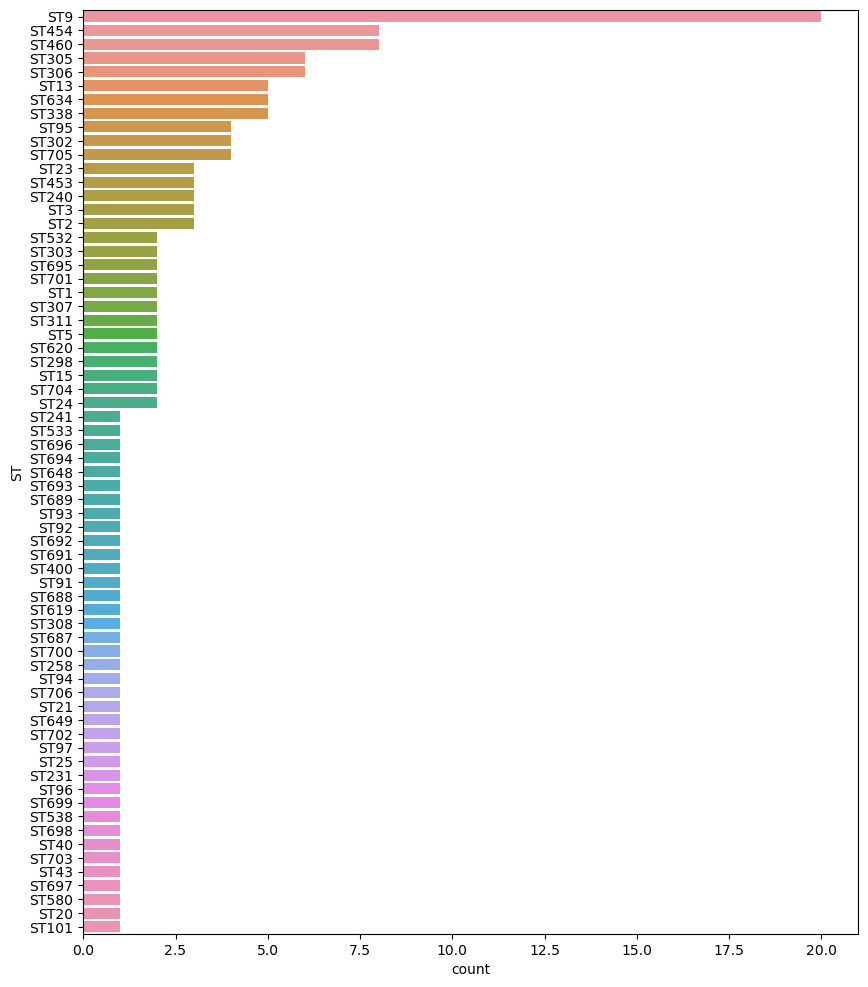

In [12]:
fig = plt.figure(figsize=(10, 12))
sns.countplot(y="ST", data=principali, order = principali['ST'].value_counts().index)
plt.show()

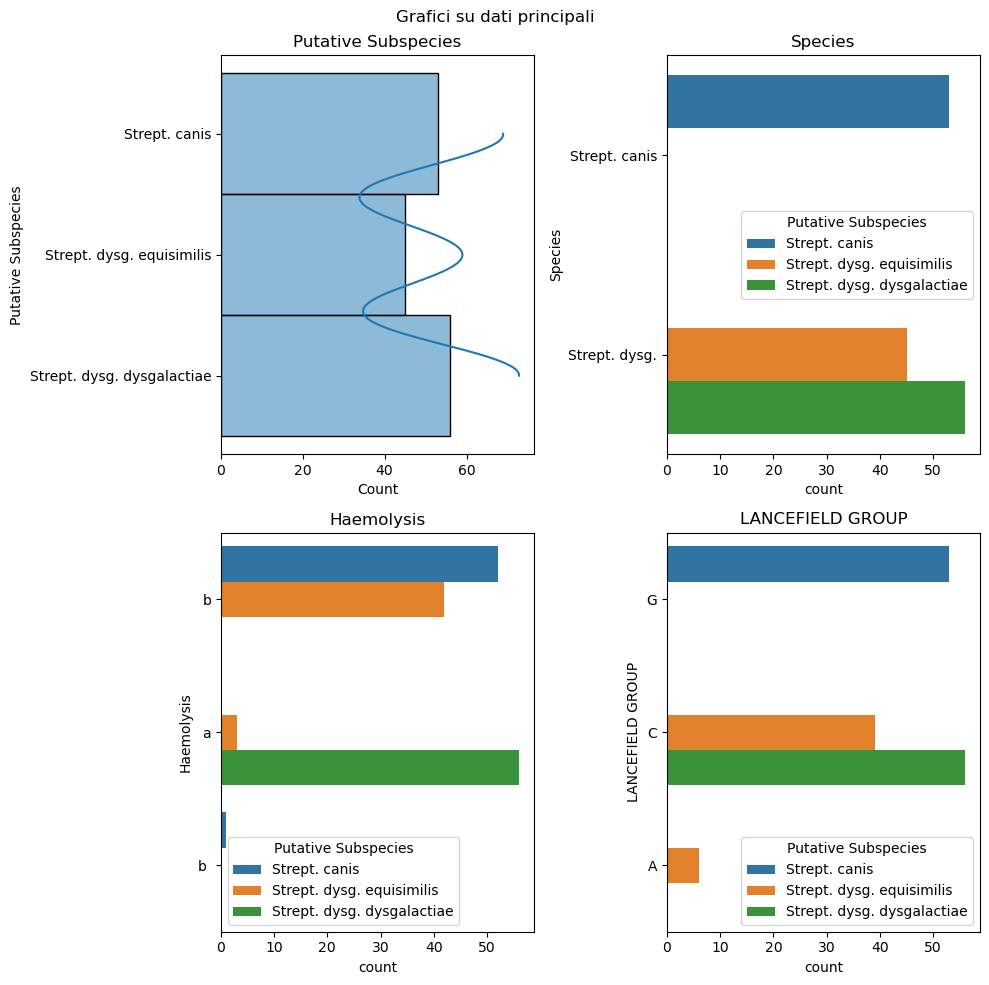

In [13]:
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(nrows=2, ncols=2)
labels = ['Putative Subspecies', 'Species', 'Haemolysis', 'LANCEFIELD GROUP']
for ax,label in zip(axes.flat, labels):
    ax.set_title(label)
    if label == 'Putative Subspecies':
        sns.histplot(data=principali, y=label, ax=ax, kde=True)
    else:
        sns.countplot(y=label, data=principali, hue="Putative Subspecies", ax=ax)

plt.suptitle("Grafici su dati principali")
plt.tight_layout()
plt.show()

# Analisi Picchi Maldi

In [14]:
maldi

,"2057,143278","2064,798679","2071,138797","2085,647901","2103,986922","2117,879078","2129,309534","2143,905333","2173,98153","2188,116404",...,"13617,65054","14104,26499","14945,23828","15048,68998","15154,39575","15353,52046","15399,07159","15495,16655","16076,29338","16202,09535"
ID Strain,,,,,,,,,,,,,,,,,,,,,
V13,"7,98659E-05",NaN,NaN,NaN,"8,6366E-05",NaN,"5,18954E-05","4,71446E-05","6,79758E-05","4,98065E-05",...,NaN,NaN,"6,6474E-05","0,000142108",NaN,NaN,NaN,NaN,NaN,NaN
V142,NaN,NaN,"4,95094E-05","4,4623E-05","7,7739E-05",NaN,"4,71991E-05",NaN,"9,10179E-05",NaN,...,NaN,NaN,"8,50988E-05","0,000194467",NaN,NaN,NaN,NaN,NaN,NaN
V151,NaN,NaN,"6,02675E-05","4,77862E-05","0,000100212",NaN,NaN,"4,66259E-05","5,38334E-05","5,36443E-05",...,NaN,NaN,"9,21027E-05","6,97349E-05",NaN,NaN,NaN,NaN,NaN,NaN
V160,NaN,NaN,"6,55556E-05",NaN,"8,85014E-05",NaN,"5,06035E-05",NaN,"6,73724E-05",NaN,...,NaN,NaN,"9,8051E-05","0,000135981",NaN,NaN,NaN,NaN,NaN,NaN
V161,NaN,NaN,NaN,NaN,"7,72199E-05",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"8,86343E-05","0,000203245",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V800,"5,54677E-05",NaN,NaN,"6,04758E-05","0,000104711",NaN,NaN,NaN,"0,000117229",NaN,...,NaN,"3,59969E-05","7,29765E-05","5,96036E-05",NaN,NaN,NaN,NaN,NaN,NaN
V82,"4,27382E-05",NaN,NaN,NaN,"6,63897E-05",NaN,NaN,NaN,"5,30903E-05","4,95847E-05",...,NaN,NaN,"8,98385E-05","0,000143522",NaN,NaN,NaN,NaN,NaN,NaN
V90,NaN,NaN,"5,06192E-05",NaN,"8,87478E-05",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"0,000103564","0,000137316",NaN,NaN,"5,13985E-05",NaN,NaN,NaN


In [15]:
maldi.isnull().sum().sort_values(ascending=False).head(20)

5780,539599    140
6587,606933    139
2423,645677    138
2535,074449    138
6814,418663    138
5283,615576    138
3406,307673    138
5114,565557    138
2392,41521     138
4877,931808    138
9652,709405    138
2249,262227    137
15353,52046    137
5296,883734    136
6861,319414    136
2490,961213    136
5639,896531    136
3061,280788    136
4142,664282    136
15495,16655    136
dtype: int64

In [16]:
#sostituisco tutti i NaN con 0
maldi.fillna(0,inplace=True)

##### Preparazione dati maldi

In [17]:
maldi = maldi.replace(',', '.', regex=True)
maldi

,"2057,143278","2064,798679","2071,138797","2085,647901","2103,986922","2117,879078","2129,309534","2143,905333","2173,98153","2188,116404",...,"13617,65054","14104,26499","14945,23828","15048,68998","15154,39575","15353,52046","15399,07159","15495,16655","16076,29338","16202,09535"
ID Strain,,,,,,,,,,,,,,,,,,,,,
V13,7.98659E-05,0,0,0,8.6366E-05,0,5.18954E-05,4.71446E-05,6.79758E-05,4.98065E-05,...,0,0,6.6474E-05,0.000142108,0,0,0,0,0,0
V142,0,0,4.95094E-05,4.4623E-05,7.7739E-05,0,4.71991E-05,0,9.10179E-05,0,...,0,0,8.50988E-05,0.000194467,0,0,0,0,0,0
V151,0,0,6.02675E-05,4.77862E-05,0.000100212,0,0,4.66259E-05,5.38334E-05,5.36443E-05,...,0,0,9.21027E-05,6.97349E-05,0,0,0,0,0,0
V160,0,0,6.55556E-05,0,8.85014E-05,0,5.06035E-05,0,6.73724E-05,0,...,0,0,9.8051E-05,0.000135981,0,0,0,0,0,0
V161,0,0,0,0,7.72199E-05,0,0,0,0,0,...,0,0,8.86343E-05,0.000203245,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V800,5.54677E-05,0,0,6.04758E-05,0.000104711,0,0,0,0.000117229,0,...,0,3.59969E-05,7.29765E-05,5.96036E-05,0,0,0,0,0,0
V82,4.27382E-05,0,0,0,6.63897E-05,0,0,0,5.30903E-05,4.95847E-05,...,0,0,8.98385E-05,0.000143522,0,0,0,0,0,0
V90,0,0,5.06192E-05,0,8.87478E-05,0,0,0,0,0,...,0,0,0.000103564,0.000137316,0,0,5.13985E-05,0,0,0


In [18]:
columns = maldi.columns
for column in columns:
    maldi[column] = maldi[column].astype(float)
maldi

,"2057,143278","2064,798679","2071,138797","2085,647901","2103,986922","2117,879078","2129,309534","2143,905333","2173,98153","2188,116404",...,"13617,65054","14104,26499","14945,23828","15048,68998","15154,39575","15353,52046","15399,07159","15495,16655","16076,29338","16202,09535"
ID Strain,,,,,,,,,,,,,,,,,,,,,
V13,0.000080,0.0,0.000000,0.000000,0.000086,0.000000,0.000052,0.000047,0.000068,0.000050,...,0.0,0.000000,0.000066,0.000142,0.0,0.0,0.000000,0.0,0.0,0.0
V142,0.000000,0.0,0.000050,0.000045,0.000078,0.000000,0.000047,0.000000,0.000091,0.000000,...,0.0,0.000000,0.000085,0.000194,0.0,0.0,0.000000,0.0,0.0,0.0
V151,0.000000,0.0,0.000060,0.000048,0.000100,0.000000,0.000000,0.000047,0.000054,0.000054,...,0.0,0.000000,0.000092,0.000070,0.0,0.0,0.000000,0.0,0.0,0.0
V160,0.000000,0.0,0.000066,0.000000,0.000089,0.000000,0.000051,0.000000,0.000067,0.000000,...,0.0,0.000000,0.000098,0.000136,0.0,0.0,0.000000,0.0,0.0,0.0
V161,0.000000,0.0,0.000000,0.000000,0.000077,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000089,0.000203,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V800,0.000055,0.0,0.000000,0.000060,0.000105,0.000000,0.000000,0.000000,0.000117,0.000000,...,0.0,0.000036,0.000073,0.000060,0.0,0.0,0.000000,0.0,0.0,0.0
V82,0.000043,0.0,0.000000,0.000000,0.000066,0.000000,0.000000,0.000000,0.000053,0.000050,...,0.0,0.000000,0.000090,0.000144,0.0,0.0,0.000000,0.0,0.0,0.0
V90,0.000000,0.0,0.000051,0.000000,0.000089,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000104,0.000137,0.0,0.0,0.000051,0.0,0.0,0.0


In [19]:
map_target = {
    "Strept. canis" : 0,
    "Strept. dysg. equisimilis" : 1,
    "Strept. dysg. dysgalactiae" : 2  
}
maldi['target'] = principali["Putative Subspecies"].map(map_target)
#sns.pairplot(data=maldi, hue='target')
maldi[['target']].sample(10)

,target
ID Strain,
V720,1
V539,1
V297,0
V536,1
V284,2
V52,1
V239,2
V763,0
V634,2


In [33]:
#pd.DataFrame(maldi.describe().transpose)
maldi.describe()

,"2057,143278","2064,798679","2071,138797","2085,647901","2103,986922","2117,879078","2129,309534","2143,905333","2173,98153","2188,116404",...,"14104,26499","14945,23828","15048,68998","15154,39575","15353,52046","15399,07159","15495,16655","16076,29338","16202,09535",target
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,0.000026,0.000260,0.000314,0.000019,0.000069,0.000010,0.000007,0.000008,0.000050,0.000013,...,0.000010,0.000065,0.000204,0.000028,0.000008,0.000010,0.000006,0.000021,0.000015,1.019481
std,0.000031,0.003137,0.003797,0.000024,0.000019,0.000019,0.000018,0.000017,0.000042,0.000023,...,0.000019,0.000039,0.000196,0.000067,0.000026,0.000019,0.000016,0.000042,0.000029,0.843822
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000055,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000051,0.000063,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000068,0.000000,0.000000,0.000000,0.000057,0.000000,...,0.000000,0.000072,0.000124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000047,0.000000,0.000000,0.000041,0.000078,0.000000,0.000000,0.000000,0.000078,0.000038,...,0.000000,0.000091,0.000292,0.000000,0.000000,0.000000,0.000000,0.000027,0.000035,2.000000
max,0.000153,0.038930,0.047130,0.000077,0.000143,0.000059,0.000063,0.000058,0.000234,0.000088,...,0.000060,0.000150,0.001020,0.000371,0.000164,0.000079,0.000076,0.000216,0.000150,2.000000


#### Ricerca correllazioni più alte con variabile target 

In [20]:
corr = maldi.corr()
corr

,"2057,143278","2064,798679","2071,138797","2085,647901","2103,986922","2117,879078","2129,309534","2143,905333","2173,98153","2188,116404",...,"14104,26499","14945,23828","15048,68998","15154,39575","15353,52046","15399,07159","15495,16655","16076,29338","16202,09535",target
"2057,143278",1.000000,-0.068457,-0.066517,0.493853,0.380472,-0.031394,0.185633,0.240985,0.473723,0.384678,...,-0.053156,-0.246925,0.113149,0.119611,0.219807,-0.236770,0.326854,-0.045185,-0.087578,-0.077452
"2064,798679",-0.068457,1.000000,-0.006892,0.068057,-0.042973,-0.041741,-0.034696,-0.037146,0.057989,-0.047709,...,-0.044438,0.030154,0.010930,0.104194,-0.026248,-0.041066,-0.029159,-0.040067,-0.044287,-0.001285
"2071,138797",-0.066517,-0.006892,1.000000,-0.065008,0.051752,-0.041721,-0.033553,-0.036940,-0.008164,-0.046862,...,0.202014,0.177975,0.047723,-0.034155,-0.026192,0.264887,-0.028286,-0.040026,-0.044241,-0.099858
"2085,647901",0.493853,0.068057,-0.065008,1.000000,0.349521,0.151131,0.036334,0.153132,0.401137,0.149272,...,0.041255,0.056237,-0.227843,-0.040405,-0.016386,-0.168047,0.023956,-0.256025,-0.289394,0.219587
"2103,986922",0.380472,-0.042973,0.051752,0.349521,1.000000,0.068998,0.238401,0.147754,0.650993,0.208672,...,0.009707,0.054503,-0.095421,-0.087589,0.036960,-0.111735,0.070743,-0.304763,-0.343140,-0.076477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"15399,07159",-0.236770,-0.041066,0.264887,-0.168047,-0.111735,0.010620,-0.166991,-0.145347,-0.184978,-0.184012,...,0.532930,0.410916,-0.134925,-0.082834,0.009880,1.000000,-0.182203,-0.155846,-0.000985,0.233494
"15495,16655",0.326854,-0.029159,-0.028286,0.023956,0.070743,-0.182219,-0.150355,-0.134466,0.029475,0.036742,...,-0.192708,-0.551438,0.661583,0.453883,0.449534,-0.182203,1.000000,0.334343,0.225451,-0.365778
"16076,29338",-0.045185,-0.040067,-0.040026,-0.256025,-0.304763,-0.251805,-0.207773,-0.183429,-0.139203,-0.128798,...,-0.197435,-0.528830,0.806979,0.323733,0.174298,-0.155846,0.334343,1.000000,0.863215,-0.373514
"16202,09535",-0.087578,-0.044287,-0.044241,-0.289394,-0.343140,-0.180800,-0.228891,-0.214990,-0.204771,-0.187413,...,-0.021207,-0.384607,0.652187,0.214881,0.083882,-0.000985,0.225451,0.863215,1.000000,-0.224832


In [39]:
corr = corr.sort_values('target')
top_corr_inv = corr[0:5]
top_corr = corr[-6:-1]
top_corr[['target']],top_corr_inv[['target']]

(               target
 6731,019005  0.832741
 6312,28957   0.834384
 9829,326089  0.841308
 6891,554249  0.844212
 3364,797303  0.854254,
                target
 6327,306693 -0.875539
 6710,334937 -0.745410
 5522,688276 -0.710834
 3762,662684 -0.703397
 3354,28405  -0.695326)

#### Pairplot 10 best correlation score

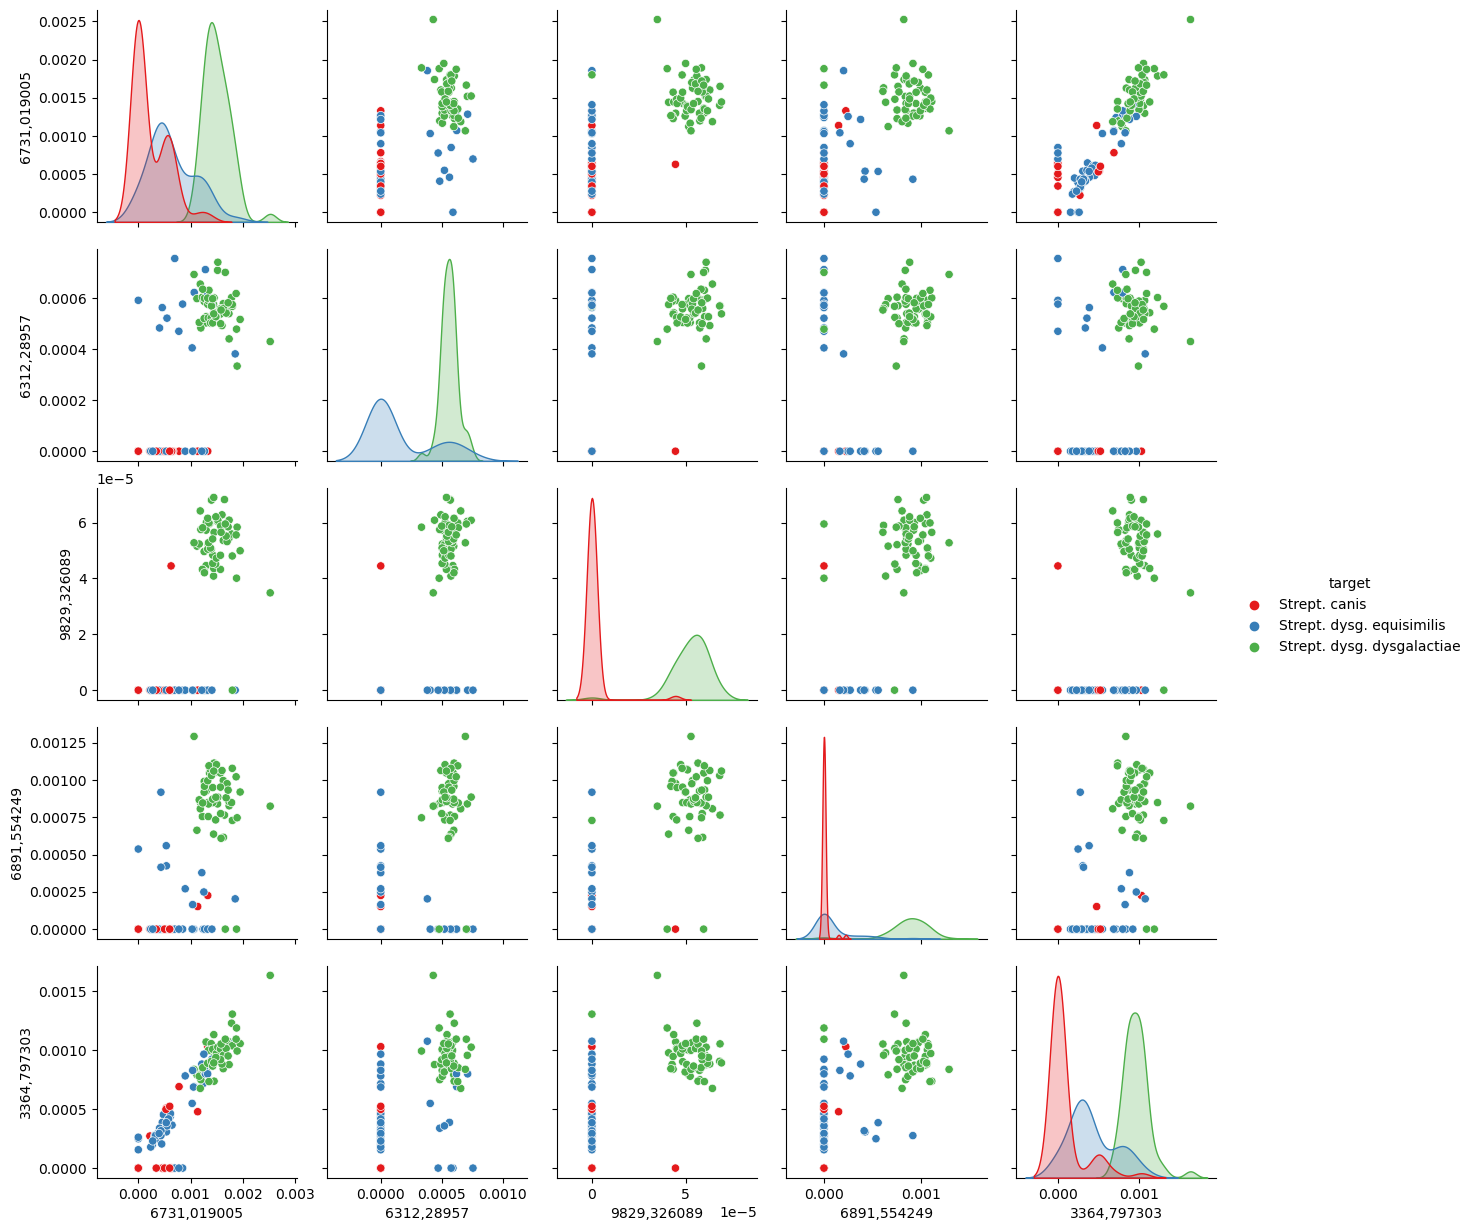

In [22]:
map_target_to_name = {
    0 : "Strept. canis",
    1 : "Strept. dysg. equisimilis",
    2 : "Strept. dysg. dysgalactiae"  
}
pairplot = maldi[top_corr.index.to_series()]
pairplot['target'] = maldi['target'].map(map_target_to_name)

sns.pairplot(data=pairplot, hue="target", palette=sns.color_palette('Set1'))
plt.show()

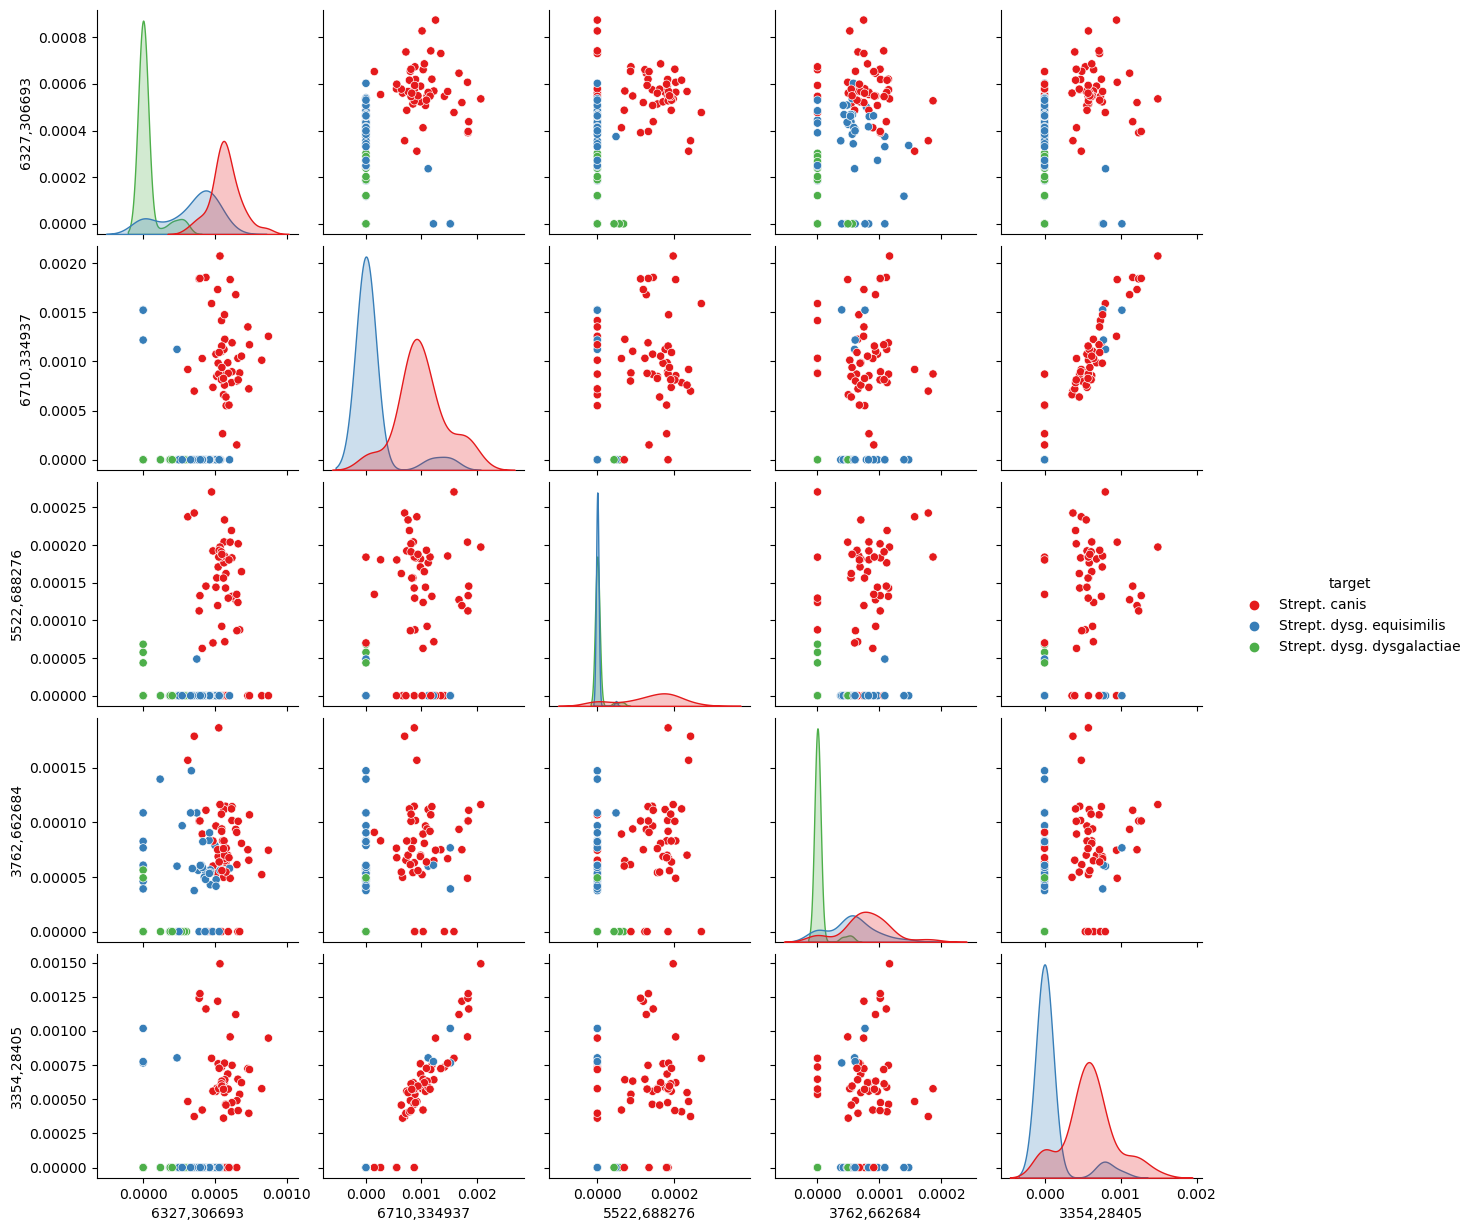

In [23]:
pairplot = maldi[top_corr_inv.index.to_series()]
pairplot['target'] = maldi['target'].map(map_target_to_name)
sns.pairplot(data=pairplot, hue="target", palette=sns.color_palette('Set1'))
plt.show()

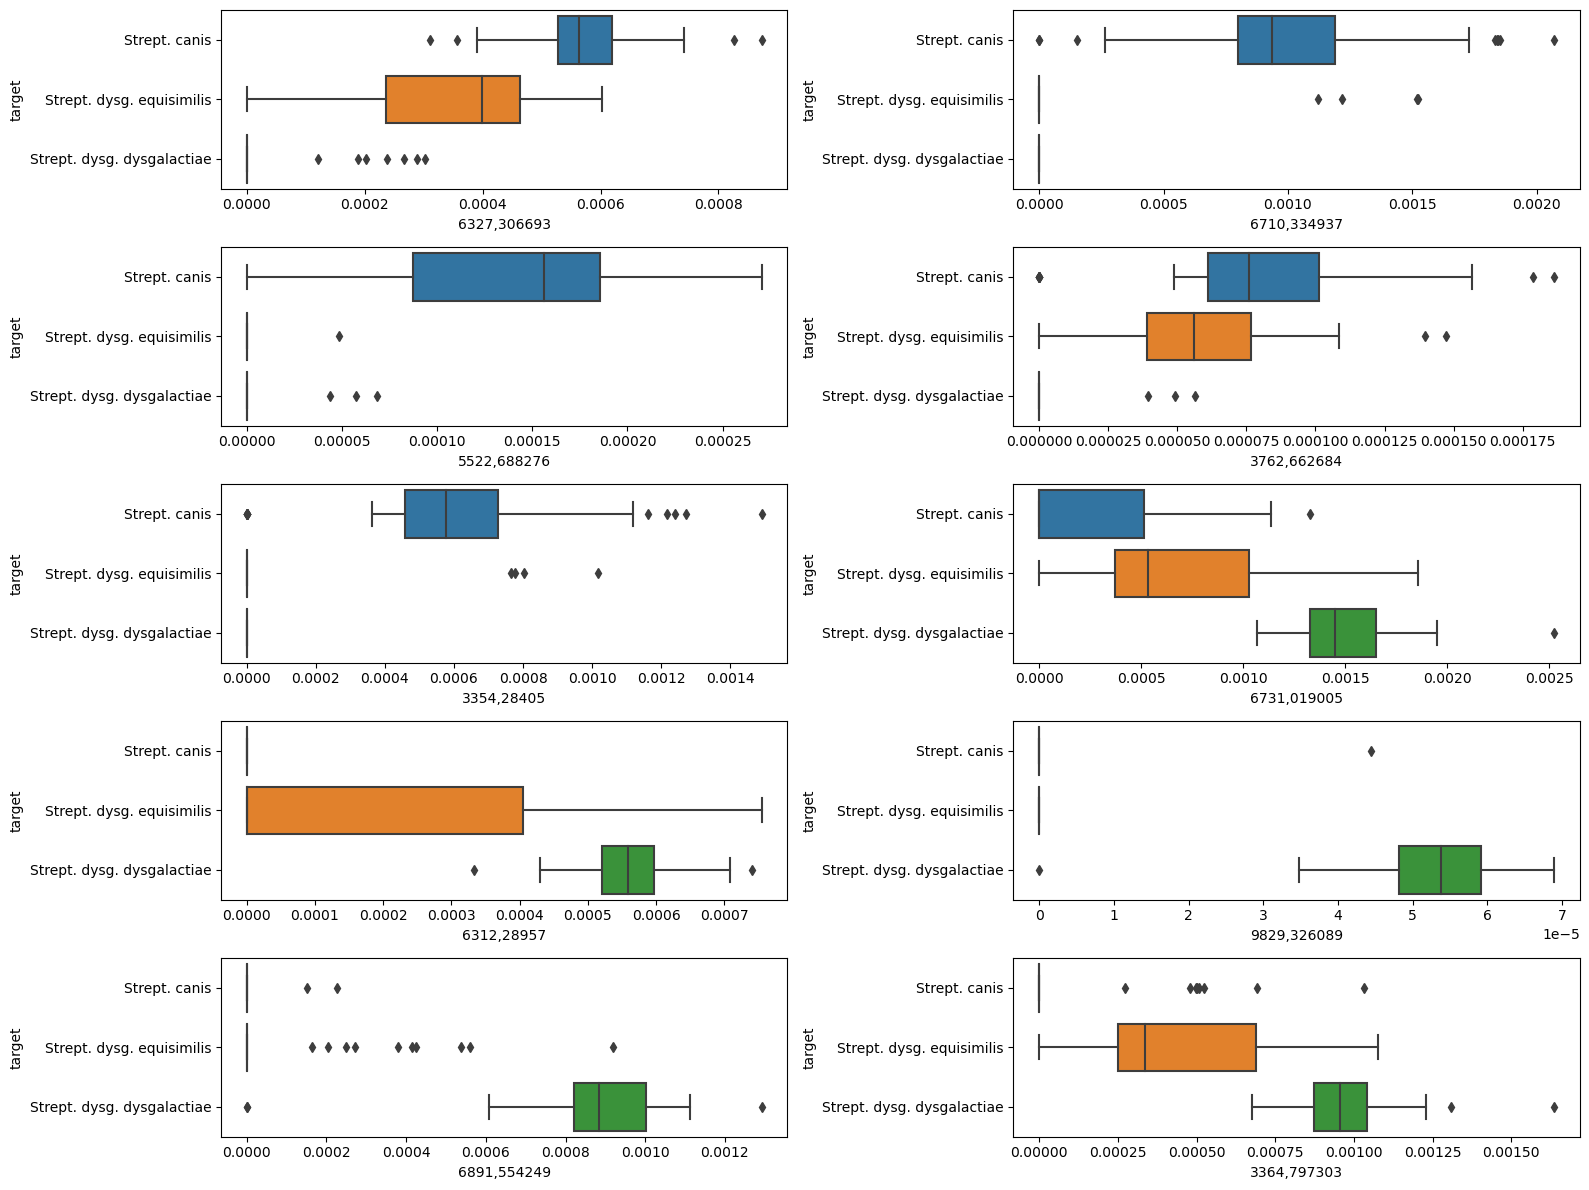

In [42]:
s1 = top_corr_inv.index
s2 = top_corr.index
boxplot_col = np.concatenate([s1, s2])
boxplot = maldi[boxplot_col]
boxplot['target'] = maldi['target'].map(map_target_to_name)
fig = plt.figure(figsize=(16, 12))
axes = fig.subplots(nrows=5, ncols=2)
for ax, column in zip(axes.flat, boxplot):
    sns.boxplot(y="target", x=column, data=boxplot, ax=ax)
plt.tight_layout()
plt.show()

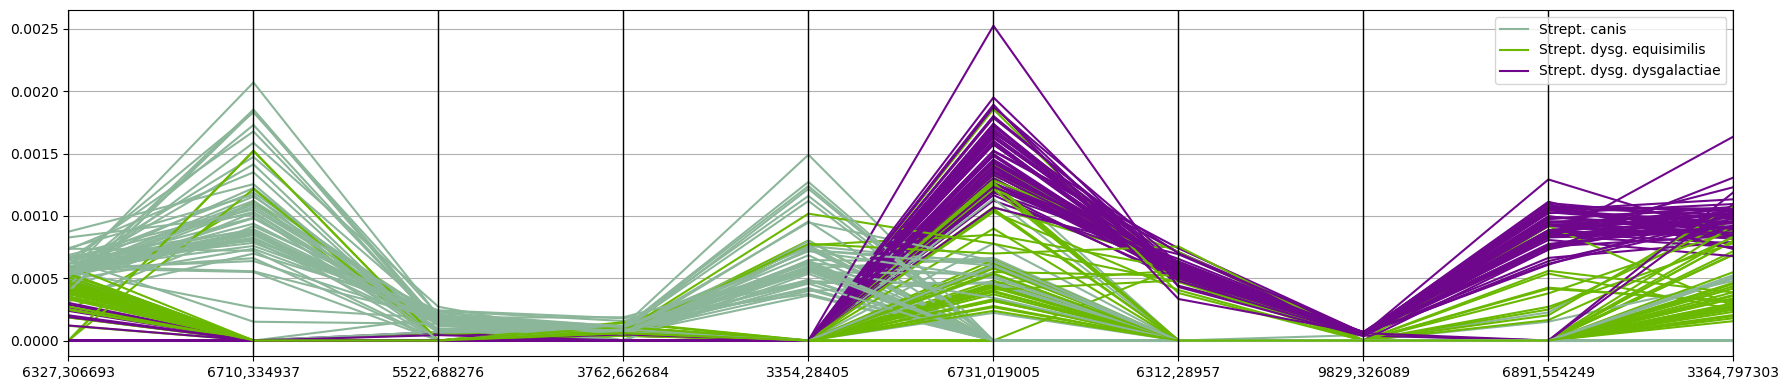

In [25]:
fig = plt.figure(figsize=(18, 4))
ax = fig.subplots()
parallel_coordinates(boxplot, class_column="target", ax=ax)
plt.tight_layout()
fig.show()

## Antibiotici

In [44]:
boxplot = antibiotici[0:10]
boxplot

,Eritromicina,Ceftiofur,Tetraciclina,Gentamicina,Penicillina,Ampicillina,Sulfametossazolo_trimethoprim,Clindamicina,Enrofloxacin
ID Strain,,,,,,,,,
V13,NS,S,NS,NS,S,S,S,S,NS
V142,NS,S,S,S,S,S,S,S,NS
V151,S,S,S,NS,S,S,S,S,NS
V160,S,S,NS,NS,S,S,S,S,NS
V161,S,S,S,NS,S,S,S,S,NS
V175,S,S,NS,S,S,S,S,S,S
V186,S,S,S,S,S,S,S,S,NS
V188,S,S,S,S,S,S,S,S,S
V190,NS,S,NS,NS,S,S,S,S,S


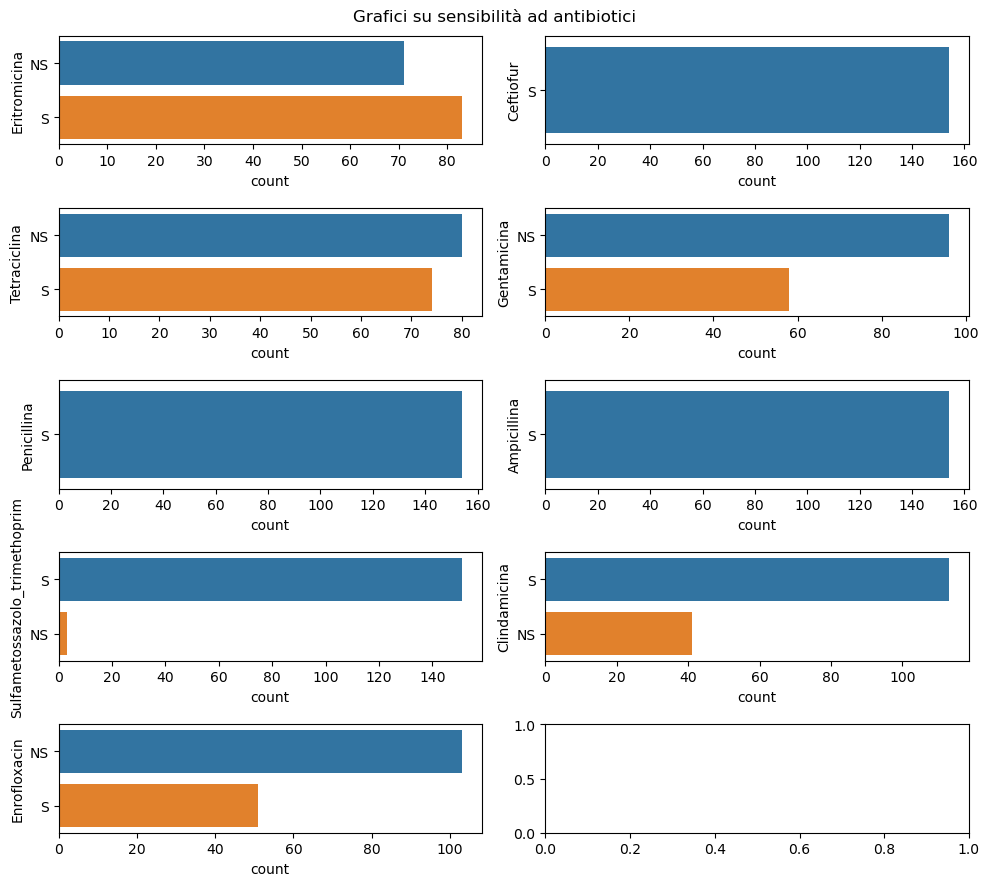

In [48]:
fig = plt.figure(figsize=(10, 9))
axes = fig.subplots(nrows=5, ncols=2)

for ax, column in zip(axes.flat, boxplot):
    sns.countplot(y=column, data=antibiotici, ax=ax)
plt.suptitle("Grafici su sensibilità ad antibiotici")
plt.tight_layout()
plt.show()

Da questo grafico possiamo notare come per gli antibiotici:
- Ceftiofur
- Penicillina
- Ampicillina
- Quasi totalmente anche Sulfametossazolo_trimethoprim

Si ha il 100% delle volte o quasi, sensibilità all'antibiotico, è inutile quindi cercare di creare un modello di previsione su di loro, il dataset è troppo sbilanciato per poter dar risultati veritieri